# Parameterization of the temperature-density relation

We can approximate the temperature density relation with a power law

$$ T(\rho) = T_0 \left( \frac{\rho}{\bar \rho} \right)^{\gamma-1} $$

We need to marginalize over $T_0(z)$ and $\gamma(z)$, for some parameterization of their redshift evolution.

In Pedersen et al. (2021, 2022) we used a fiducial model for $\gamma$ (from the "central sim") multiplied by a low-order polynomial around $z_\star = 3$:
$$ \ln \gamma(z) = \ln \gamma_{\rm fid}(z)  + a_\gamma + b_\gamma \ln \frac{1+z}{1+z_\star} $$

Instead of modelling $T_0$, we modelled the thermal broadening length in velocity units, $\sigma_T$, with a similar expansion as for $\gamma$.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from cup1d.nuisance import thermal_model

In [2]:
# construct two thermal models with different number of parameters
T_model=thermal_model.ThermalModel(ln_sigT_kms_coeff=[1,0,-0.1],ln_gamma_coeff=[-1,0,0.1])
T_model_fid=thermal_model.ThermalModel()

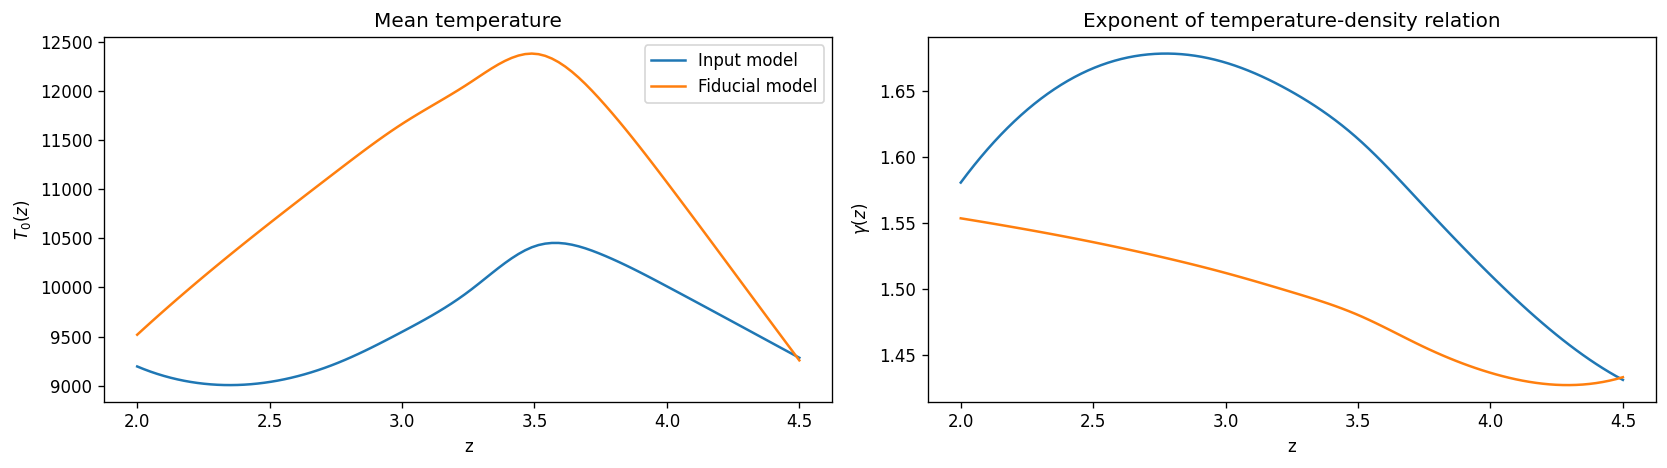

In [3]:
# plot T_0 and gamma in both models
z=np.linspace(2.0,4.5,100)
plt.figure(figsize=[14,4])
# start with T_0
plt.subplot(1, 2, 1)
plt.plot(z,T_model.get_T0(z),label='Input model')
plt.plot(z,T_model_fid.get_T0(z),label='Fiducial model')
plt.xlabel('z')
plt.ylabel(r'$T_0(z)$')
plt.title('Mean temperature')
plt.legend()
# now gamma
plt.subplot(1, 2, 2)
plt.plot(z,T_model.get_gamma(z),label='Input model')
plt.plot(z,T_model_fid.get_gamma(z),label='Fiducial model')
plt.xlabel('z')
plt.ylabel(r'$\gamma(z)$')
plt.title('Exponent of temperature-density relation')
plt.tight_layout()

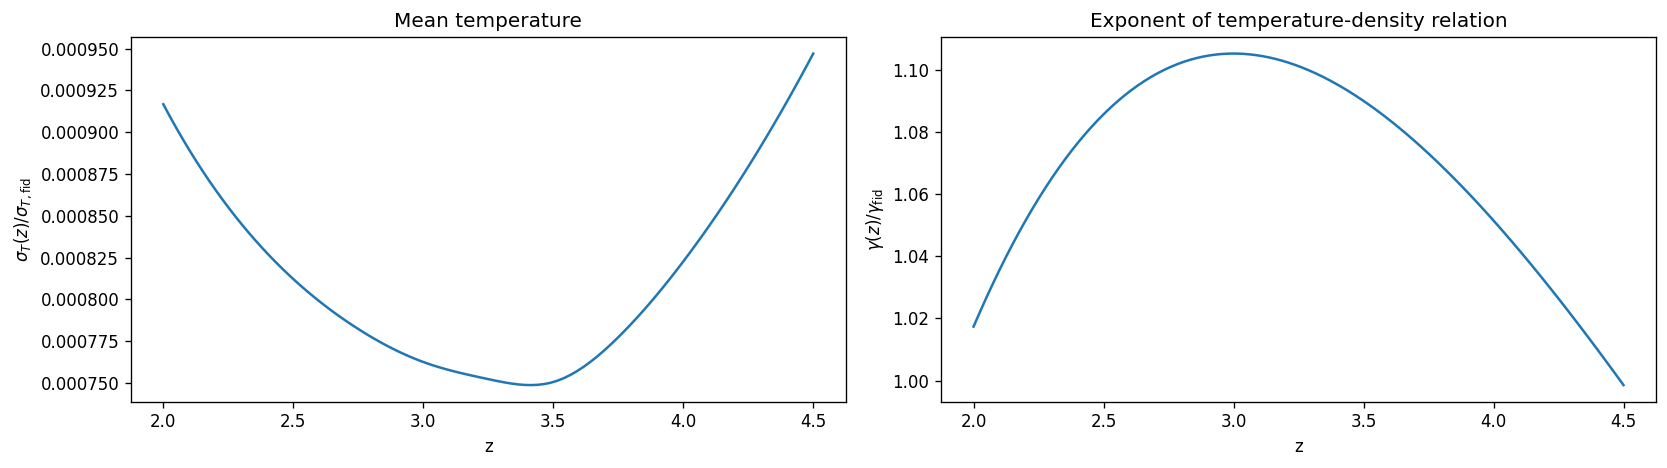

In [4]:
# plot T_0 and gamma in both models
z=np.linspace(2.0,4.5,100)
plt.figure(figsize=[14,4])
# start with sigT_kms
plt.subplot(1, 2, 1)
plt.plot(z,T_model.get_sigT_kms(z)/T_model_fid.get_T0(z))
plt.xlabel('z')
plt.ylabel(r'$\sigma_T(z) / \sigma_{T, \rm{fid}}$')
plt.title('Mean temperature')
# now gamma
plt.subplot(1, 2, 2)
plt.plot(z,T_model.get_gamma(z)/T_model_fid.get_gamma(z))
plt.xlabel('z')
plt.ylabel(r'$\gamma(z) / \gamma_{\rm fid}$')
plt.title('Exponent of temperature-density relation')
plt.tight_layout()

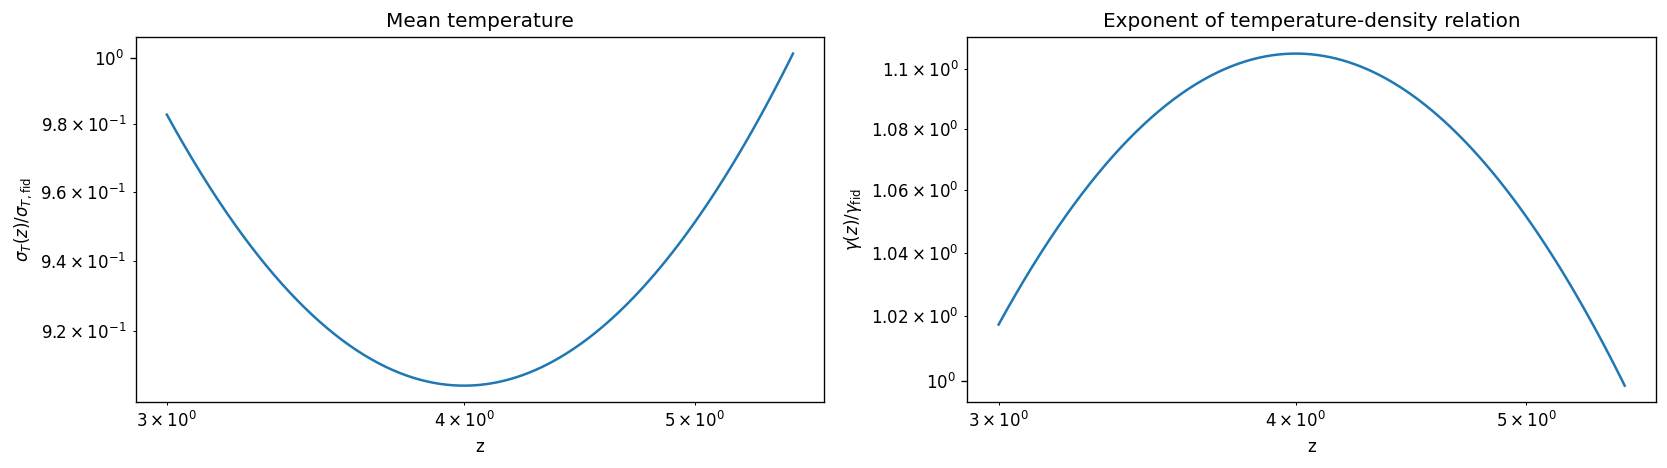

In [5]:
# plot T_0 and gamma in both models
z=np.linspace(2.0,4.5,100)
plt.figure(figsize=[14,4])
# start with sigT_kms
plt.subplot(1, 2, 1)
plt.loglog(1+z,T_model.get_sigT_kms(z)/T_model_fid.get_sigT_kms(z))
plt.xlabel('z')
plt.ylabel(r'$\sigma_T(z) / \sigma_{T, \rm{fid}}$')
plt.title('Mean temperature')
# now gamma
plt.subplot(1, 2, 2)
plt.loglog(1+z,T_model.get_gamma(z)/T_model_fid.get_gamma(z))
plt.xlabel('z')
plt.ylabel(r'$\gamma(z) / \gamma_{\rm fid}$')
plt.title('Exponent of temperature-density relation')
plt.tight_layout()